In [5]:
from hrr import *
from Agent import *
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

In [6]:
color_set = ["red", "green"]

maze_size = 20
row_size = 4

goals = [4,7]

hrr_size = 1024 # Dimensionality of the HRRs (minimum 10x maze_size)

# All now pre-assigned in Agent, but can be overwritten in constructor
policy_gamma = 0.9 # Delayed reward coefficient 
policy_alpha = 0.001 # Learning rate
policy_epsilon = 0.03 # Random action chance
policy_lambda = 0.1 # delta affector

epochs = 1000 
max_moves = maze_size

ltm = LTM(N=hrr_size, normalized=True, M=1)
yellow_steps = []

choice_function = np.mean 

In [7]:
actor = Agent(["left", "right", "up", "down"], 32, ltm)
i_gate = Agent(["open", "close"], 8, ltm)

In [8]:
for epoch in range(epochs):
    current_state = np.random.choice(maze_size)
    goal_idx = np.random.choice(range(len(color_set)))
    steps_with_yellow = 0
    current_signal = color_set[goal_idx]
    
    current_wm = "I"
    
    if(epoch+1) % 10 == 0:
        print('\rEpisode:', (epoch+1), end='')
        
    for step in range(max_moves):
        if current_state == goals[goal_idx]:
            break
        
        if current_signal != "I":
            i_gate.policy(current_state, current_signal, current_wm)
        
            if i_gate.current_action == i_gate.action_set[0]:
                current_wm = current_signal
        
        actor.policy(current_state, current_signal, current_wm)
        
        prev_state = current_state
        
        if actor.current_action == actor.action_set[0]:
            current_state = current_state-1
            current_state = current_state+row_size if (current_state+1) % row_size == 0 else current_state
        elif actor.current_action == actor.action_set[1]:
            current_state = (current_state+1)
            current_state = current_state-row_size if current_state % row_size == 0 else current_state
        elif actor.current_action == actor.action_set[2]:
            current_state = (current_state-row_size)%maze_size
        elif actor.current_action == actor.action_set[3]:
            current_state = (current_state+row_size)%maze_size
            
        is_goal = current_state == goals[goal_idx]
            
        actor.update(current_state, current_signal, current_wm, is_goal)
        if current_signal != "I":
            i_gate.update(current_state, current_signal, current_wm, is_goal)
            
        current_signal = "I"

Episode: 1000

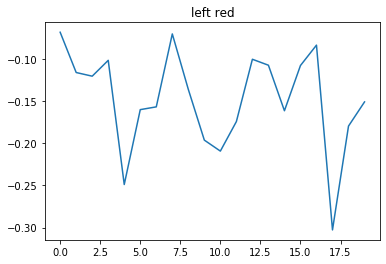

[[-0.06819917 -0.11601415 -0.12035838 -0.1015577 ]
 [-0.2489695  -0.16007414 -0.15677962 -0.07019103]
 [-0.13604924 -0.19627458 -0.20929742 -0.17424238]
 [-0.10027865 -0.10734721 -0.16138671 -0.10771331]
 [-0.08350712 -0.3028649  -0.17959924 -0.15090016]]


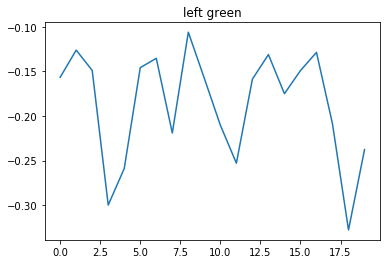

[[-0.15653804 -0.12604254 -0.14883703 -0.29992288]
 [-0.2588746  -0.14571427 -0.13523751 -0.21902508]
 [-0.10598692 -0.15774634 -0.21029635 -0.2529217 ]
 [-0.15864706 -0.13104148 -0.1749394  -0.14900151]
 [-0.1285619  -0.20884497 -0.32781333 -0.23767218]]


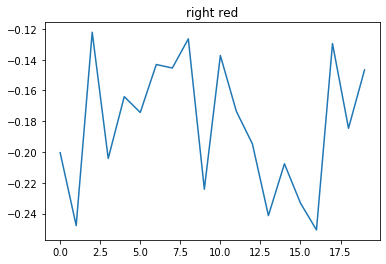

[[-0.20042466 -0.24777596 -0.12213188 -0.20416336]
 [-0.16398476 -0.17427918 -0.14309871 -0.14538483]
 [-0.1264519  -0.22416814 -0.1372607  -0.17358235]
 [-0.19470204 -0.24130712 -0.2076384  -0.23316835]
 [-0.25062627 -0.12951352 -0.18453705 -0.14662601]]


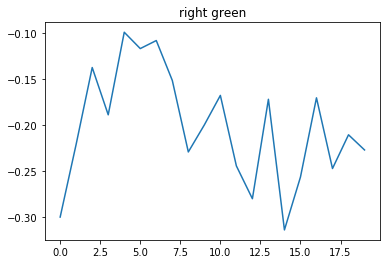

[[-0.30037874 -0.22087096 -0.13745691 -0.1889632 ]
 [-0.09901337 -0.1168087  -0.10806046 -0.15150826]
 [-0.22942917 -0.19996335 -0.16782776 -0.24463981]
 [-0.28036988 -0.17205517 -0.31436378 -0.25679627]
 [-0.17046072 -0.24747728 -0.21073705 -0.22725138]]


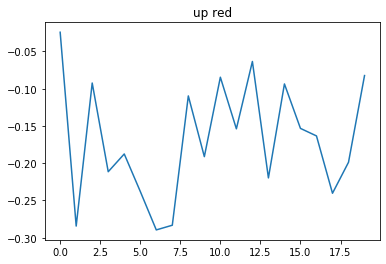

[[-0.02417906 -0.2843521  -0.09233493 -0.21139154]
 [-0.18756774 -0.23781851 -0.28951278 -0.28321588]
 [-0.10965528 -0.19117364 -0.08454183 -0.15381213]
 [-0.06341854 -0.21971004 -0.09357402 -0.1532446 ]
 [-0.16335346 -0.24030001 -0.19870603 -0.08232071]]


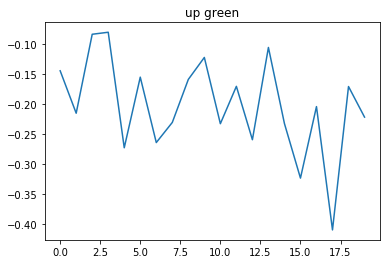

[[-0.1444736  -0.21509542 -0.08368431 -0.08032901]
 [-0.27259895 -0.15506256 -0.26393843 -0.23042594]
 [-0.15884995 -0.12228779 -0.23254147 -0.17037226]
 [-0.25917777 -0.10565199 -0.23229802 -0.32309142]
 [-0.20406896 -0.40931284 -0.1706745  -0.22157146]]


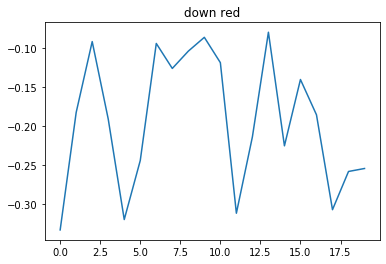

[[-0.33288386 -0.18202211 -0.09113501 -0.19051822]
 [-0.319561   -0.24378207 -0.09352094 -0.1255876 ]
 [-0.10339145 -0.08564941 -0.11817073 -0.3114605 ]
 [-0.21340221 -0.07913211 -0.22493827 -0.13980956]
 [-0.18510939 -0.3069159  -0.25785872 -0.25403878]]


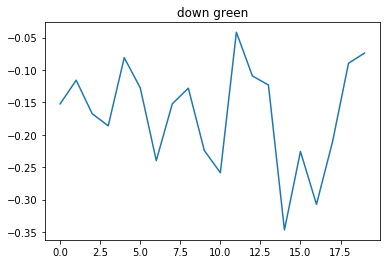

[[-0.15224354 -0.11579874 -0.1675369  -0.18617484]
 [-0.08098039 -0.1275849  -0.2398777  -0.15221004]
 [-0.12810439 -0.2243424  -0.2585843  -0.04168853]
 [-0.1091763  -0.12310287 -0.3469134  -0.22580153]
 [-0.30743703 -0.2110347  -0.08957943 -0.07383592]]


ValueError: cannot reshape array of size 80 into shape (8,20)

In [22]:
data = []

for action in actor.action_set:
    for color in color_set:
        pick = []
        pick += [choice_function(actor.model.predict(actor.encode(state, action, color))+actor.bias) for state in range(maze_size)]
        plt.plot(pick)
        plt.title(action + ' ' + color)
        plt.show()
        print(np.reshape(pick, [int(maze_size/row_size), row_size]))
    data += pick
    
# Format for showing all on one graph
data = np.reshape(data, [len(actor.action_set)*len(color_set),maze_size])

